# Pruebas de modelos
Annette Pamela Ruiz Abreu - A01423595

## Librerías

In [323]:
import random
import numpy as np
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import statsmodels.api as sm
import seaborn as sns


import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import KFold
from sklearn import tree
from IPython.display import Image as PImage
from subprocess import check_call

from sklearn.metrics import mean_squared_error, r2_score, precision_score, recall_score, accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score as ss
import itertools


from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans


plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

from sklearn.naive_bayes import GaussianNB
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.feature_extraction.text import TfidfVectorizer

import nltk
from nltk.corpus import cess_esp
import nltk.tokenize
from nltk.tokenize import word_tokenize
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import es_core_news_sm
nlp = es_core_news_sm.load()



In [115]:
random.seed(10)

## Datos

In [116]:
datos = pd.read_excel("Datos Finales/EnjoyersV2.xlsx").drop(columns=["Unnamed: 0.1", "Unnamed: 0"])

In [117]:
# Comenarios vacíos
datos["Comentario traducido"].fillna(".",inplace=True)
sentiment = SentimentIntensityAnalyzer()
datos["sentimiento"] = [sentiment.polarity_scores(datos["Comentario traducido"][i])["compound"] for i in range(10493)]
datos.head()

Año  Mes  Progreso  Duración  P1.1  P1.2  P1.3  P1.4  P1.5  P1.6  ...  \
0  2021    4       100       207     4     5     4     5     4     5  ...   
1  2021    4       100       168     4     4     4     4     2     4  ...   
2  2021    4       100       349     4     5     5     5     5     5  ...   
3  2021    4       100       245     5     5     5     3     3     5  ...   
4  2021    4       100       151     4     3     3     3     4     5  ...   

                                 Comentario para OSF  P5.1  P5.2  P5.3 P5.4  \
0  Me gustó mucho la causa a la que se estaba apo...     4     5     5    5   
1  Me gustó el servicio, pero me hubiera gustado ...     4     4     4    4   
2  Muchas gracias por el apoyo y la oportunidad d...     5     5     5    5   
3                ¡Muchas gracias por la experiencia!     5     5     5    5   
4                           Muchas gracias por todo.     4     4     4    4   

                                  Comentario general      Tipo comentario  \
0  Es complicado conseguir colaboraciones en esto...       Reconocimiento   
1  Pues ojalá que ahora sí me valgan mis horas, n...       Reconocimiento   
2  Lo único que me desagrado del servicio fue la ...  Área de oportunidad   
3  Me gusto mucho la experiencia por la apertura ...       Reconocimiento   
4  No sentí que mi trabajo tuviera impacto, fue m...  Área de oportunidad   

                                                 OSF  \
0                                  León Ortigosa ABP   
1                            Comenzar de Nuevo, A.C.   
2                 Casa Paterna La Gran Familia, A.C.   
3  Programa de Acompañamiento de Servicio Social,...   
4  Casa Monarca Ayuda Humanitaria al Migrante A.B.P.   

                                Comentario traducido sentimiento  
0  It is difficult to get collaborations in these...      0.4767  
1  Well, I hope that now my hours are worth it, n...      0.3979  
2  The only thing I disliked about the service wa...     -0.6249  
3  I really liked the experience because of the o...      0.6697  
4  I did not feel that my work had an impact, it ...      0.0000  

[5 rows x 24 columns]

# Modelos supervisados

## Regresión lineal
Columna objetivo: P1.1

In [126]:
X = datos[["P1.2", "P1.3", "P1.4", "P1.5", "P1.6", "P1.7", "P2", "P3", "P5.1", "P5.2", "P5.3", "P5.4"]]
Y = datos["P1.1"]

In [127]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=9)

In [128]:
# Create an instance of the Linear Regression model
reg = LinearRegression()

# Fit the data to the Linear Regression model (train the model)
reg.fit(X_train,Y_train)

LinearRegression()

In [129]:
predictions = reg.predict(X_test)

test_rmse = np.sqrt(mean_squared_error(Y_test,predictions))

# Determination coeficient (R2)
test_r2sc = r2_score(Y_test, predictions)

# Remember the lower the value is the better it is
print("Square root of the mean squared error",test_rmse)


# The closer to 1 the better
print("Determination Coeficient",test_r2sc)

Square root of the mean squared error 0.385049439583021
Determination Coeficient 0.725740260457236


In [130]:
print(f"Accuracy on test set: {round(reg.score(X_test,Y_test),2)}")

Accuracy on test set: 0.73


In [131]:

# Agregar una constante a la matriz de variables independientes
X = sm.add_constant(X_train)

# Ajustar el modelo de regresión lineal
model = sm.OLS(Y_train, X).fit()

# Obtener los coeficientes de regresión
coefficients = model.params

# Imprimir los coeficientes y su significancia estadística
pesos = {}
for i, variable in enumerate(X.columns):
    pesos[variable] = model.pvalues[i]
    #print(f'Variable: {variable}, Coeficiente: {coefficients[i]}, P-valor: {model.pvalues[i]}')


pesos_df = pd.DataFrame(pesos, index=[0]).transpose().rename(columns={0:"Peso"}).sort_values("Peso", ascending=False)
pesos_df

Peso
P2      9.681780e-01
P5.1    7.983216e-01
P5.4    5.740651e-01
P5.3    5.171782e-01
P5.2    3.279804e-01
P3      2.676261e-01
P1.5    7.389383e-04
const   3.188803e-05
P1.7    1.541331e-20
P1.4    2.486863e-31
P1.3    1.003688e-58
P1.6   1.225193e-103
P1.2   1.747184e-225

## Árbol de decisión
Columna objetivo: P1.1

In [132]:
# Búsqueda del mejor árbol de decisión

cv = KFold(n_splits=10) # Numero deseado de "folds" que haremos
accuracies = list()
max_attributes = len(list(datos))
depth_range = range(1, max_attributes + 1)

# Testearemos la profundidad de 1 a cantidad de atributos +1
for depth in depth_range:
    fold_accuracy = []
    tree_model = tree.DecisionTreeClassifier(criterion='entropy',
                                             min_samples_split=20,
                                             min_samples_leaf=5,
                                             max_depth = depth,
                                             class_weight={1:3.5})
    for train_fold, valid_fold in cv.split(datos):
        f_train = datos.loc[train_fold] 
        f_valid = datos.loc[valid_fold] 

        model = tree_model.fit(X = f_train[["P1.2", "P1.3", "P1.4", "P1.5", "P1.6", "P1.7", "P2", "P3", "P5.1", "P5.2", "P5.3", "P5.4"]], 
                               y = f_train["P1.1"]) 
        valid_acc = model.score(X = f_valid[["P1.2", "P1.3", "P1.4", "P1.5", "P1.6", "P1.7", "P2", "P3", "P5.1", "P5.2", "P5.3", "P5.4"]], 
                                y = f_valid["P1.1"]) # calculamos la precision con el segmento de validacion
        fold_accuracy.append(valid_acc)

    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)
    
# Mostramos los resultados obtenidos
df = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
df = df[["Max Depth", "Average Accuracy"]]
print(df.to_string(index=False))

print("Max Depth Elegido: ",df["Max Depth"][df["Average Accuracy"] == df["Average Accuracy"].max()].values)


 Max Depth  Average Accuracy
         1          0.805598
         2          0.818368
         3          0.822942
         4          0.824371
         5          0.829421
         6          0.827993
         7          0.825801
         8          0.824562
         9          0.823798
        10          0.822178
        11          0.819224
        12          0.820939
        13          0.821988
        14          0.822369
        15          0.820844
        16          0.822273
        17          0.822273
        18          0.822845
        19          0.822464
        20          0.822083
        21          0.822274
        22          0.822083
        23          0.822178
        24          0.822941
Max Depth Elegido:  [5]


In [133]:
# Creación del árbol de decisión
# Crear arrays de entrenamiento y las etiquetas que indican si llegó a top o no 
y = datos['P1.1'].values 
x = datos[["P1.2", "P1.3", "P1.4", "P1.5", "P1.6", "P1.7", "P2", "P3", "P5.1", "P5.2", "P5.3", "P5.4"]].values 


x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=9)


# Crear Arbol de decision con profundidad = 6
decision_tree = tree.DecisionTreeClassifier(criterion='entropy',
                                            min_samples_split=20,
                                            min_samples_leaf=5,
                                            max_depth = 6,
                                            class_weight={1:3.5})
decision_tree.fit(x_train, y_train)

# exportar el modelo a archivo .dot
with open(r"tree1.dot", 'w') as f:
     f = tree.export_graphviz(decision_tree,
                              out_file=f,
                              max_depth = 6,
                              impurity = True,
                              feature_names = list(datos[["P1.2", "P1.3", "P1.4", "P1.5", "P1.6", "P1.7", "P2", "P3", "P5.1", "P5.2", "P5.3", "P5.4"]]),
                              rounded = True,
                              filled= True )
        
# Convertir el archivo .dot a png para poder visualizarlo
import subprocess
from PIL import Image

# ...

# Convertir el archivo .dot a .png
subprocess.run(['dot', '-Tpng', 'tree1.dot', '-o', 'tree1.png'], check=True)

# Mostrar la imagen
image = Image.open('tree1.png')
image.show()



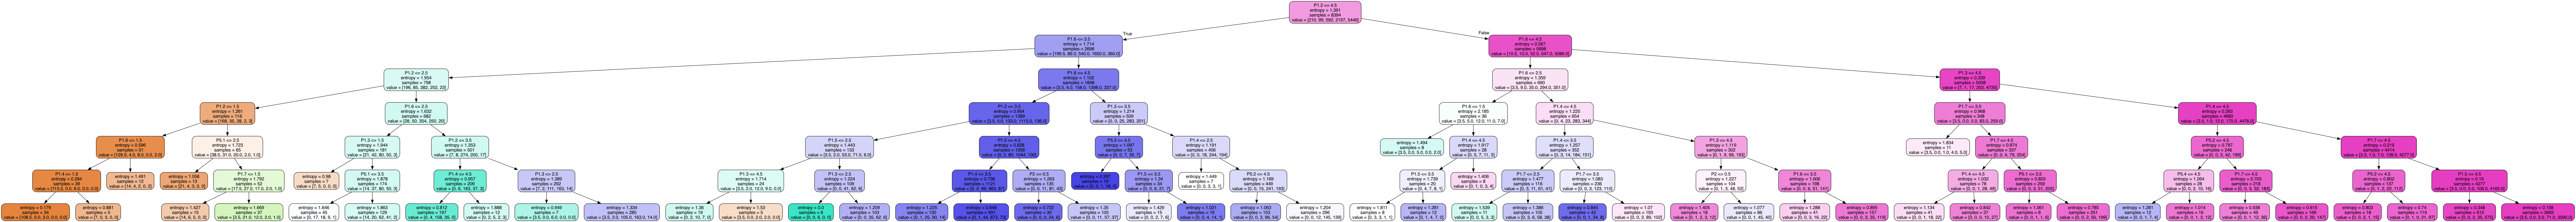

In [134]:
check_call(['dot','-Tpng',r'tree1.dot','-o',r'tree1.png'])
PImage("tree1.png")

In [135]:
# Precisión
acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)
print("Accuracy:",acc_decision_tree)
y_pred = decision_tree.predict(x_test)

Accuracy: 83.89


In [136]:
reporte = classification_report(y_test, y_pred)
print(reporte)

              precision    recall  f1-score   support

           1       0.62      0.62      0.62        21
           2       0.50      0.20      0.29        20
           3       0.55      0.51      0.53       120
           4       0.75      0.75      0.75       600
           5       0.91      0.92      0.92      1338

    accuracy                           0.84      2099
   macro avg       0.67      0.60      0.62      2099
weighted avg       0.84      0.84      0.84      2099



In [137]:
C = pd.DataFrame(confusion_matrix(y_test, y_pred), index=[1, 2, 3, 4, 5], columns=[1, 2, 3, 4, 5])
print("Matriz de confusión\n")
display(C)
display(C / C.astype(np.float).sum(axis=0))

Matriz de confusión



1  2   3    4     5
1  13  2   5    1     0
2   2  4  12    2     0
3   5  2  61   48     4
4   1  0  29  451   119
5   0  0   4   97  1237

1     2         3         4         5
1  0.619048  0.25  0.045045  0.001669  0.000000
2  0.095238  0.50  0.108108  0.003339  0.000000
3  0.238095  0.25  0.549550  0.080134  0.002941
4  0.047619  0.00  0.261261  0.752922  0.087500
5  0.000000  0.00  0.036036  0.161937  0.909559

## SVM
Columna objetivo: Tipo de comentario

In [139]:
n = len(datos)


In [140]:
datos['Tipo comentario'].replace({'Reconocimiento':1, 'Área de oportunidad':0}, inplace=True)
datos2 = datos.groupby('OSF')['Tipo comentario'].mean()
dic_promedio_tc = {}
lista_OSF = datos2.index
contador=0
for u in lista_OSF:
    dic_promedio_tc[u] = datos2[contador]
    contador+=1

datos['Comentario traducido'].fillna(' ', inplace=True)
sentiment = SentimentIntensityAnalyzer()
datos["sentimiento"] = [sentiment.polarity_scores(datos["Comentario traducido"][i])["compound"] for i in range(n)]

In [141]:
# Aqui estamos iterando entre las filas del dataset para ver si contiene valores nulos y llenarlos con la media del tipo de comentario

for u in range(n):
    if(pd.isna(datos['Tipo comentario'][u])==True):
        Org = datos['OSF'][u]
        if(dic_promedio_tc[Org] >=0):
            datos['Tipo comentario'][u] = round(dic_promedio_tc[Org])
            # Nos fijamos en la satisfacción del usuario para llenar el tipo de comentario si estaba vacío la media
        elif(pd.isna(dic_promedio_tc[Org]) == True and datos['P1.1'][u] >= 4):
            datos['Tipo comentario'][u] = 1.0

In [348]:
# Hacemos el modelo:
X = datos[["P1.2", "P1.3", "P1.4", "P1.5", "P1.6", "P1.7", "P2", "P3", "P5.1", "P5.2", "P5.3", "P5.4"]]
y =datos['Tipo comentario']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=100)
svc_modelo = SVC()
svc_modelo.fit(X_train, y_train)
y_pred = svc_modelo.predict(X_test)

In [349]:
# Calculamos la precision
precision = accuracy_score(y_test, y_pred)
print("Accuracy:", precision)

# Generamos un reporte
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Accuracy: 0.8127679847546451
Classification Report:
               precision    recall  f1-score   support

         0.0       0.67      0.20      0.31       438
         1.0       0.82      0.97      0.89      1661

    accuracy                           0.81      2099
   macro avg       0.75      0.59      0.60      2099
weighted avg       0.79      0.81      0.77      2099



# Modelos no supervisados

## PCA

In [271]:
d=datos.drop(columns=["P1.1","Año", "Mes", "Duración", "Progreso", "Comentario para OSF", "Comentario general", "OSF", "Comentario traducido", "Tipo comentario"])
d.shape

(10493, 14)

In [272]:
scaler=StandardScaler()#instantiate
scaler.fit(d) # calcula la media y estandar para cada dimension
X_scaled=scaler.transform(d)# transforma los datos a su nueva escala

In [273]:
pca=PCA(n_components=14)
#pca=PCA(.85)
pca.fit(X_scaled) # buscar los componentes principales
X_pca=pca.transform(X_scaled) 
#revisemos la forma del array
print("shape of X_pca", X_pca.shape)

shape of X_pca (10493, 14)


In [274]:
expl = pca.explained_variance_ratio_
print(expl)
print('suma:',sum(expl[0:5]))

[0.48786111 0.09911516 0.06932478 0.06264518 0.05730401 0.04283764
 0.0330456  0.02863943 0.02631474 0.02288485 0.02079398 0.02010835
 0.0178413  0.01128389]
suma: 0.7762502301921423


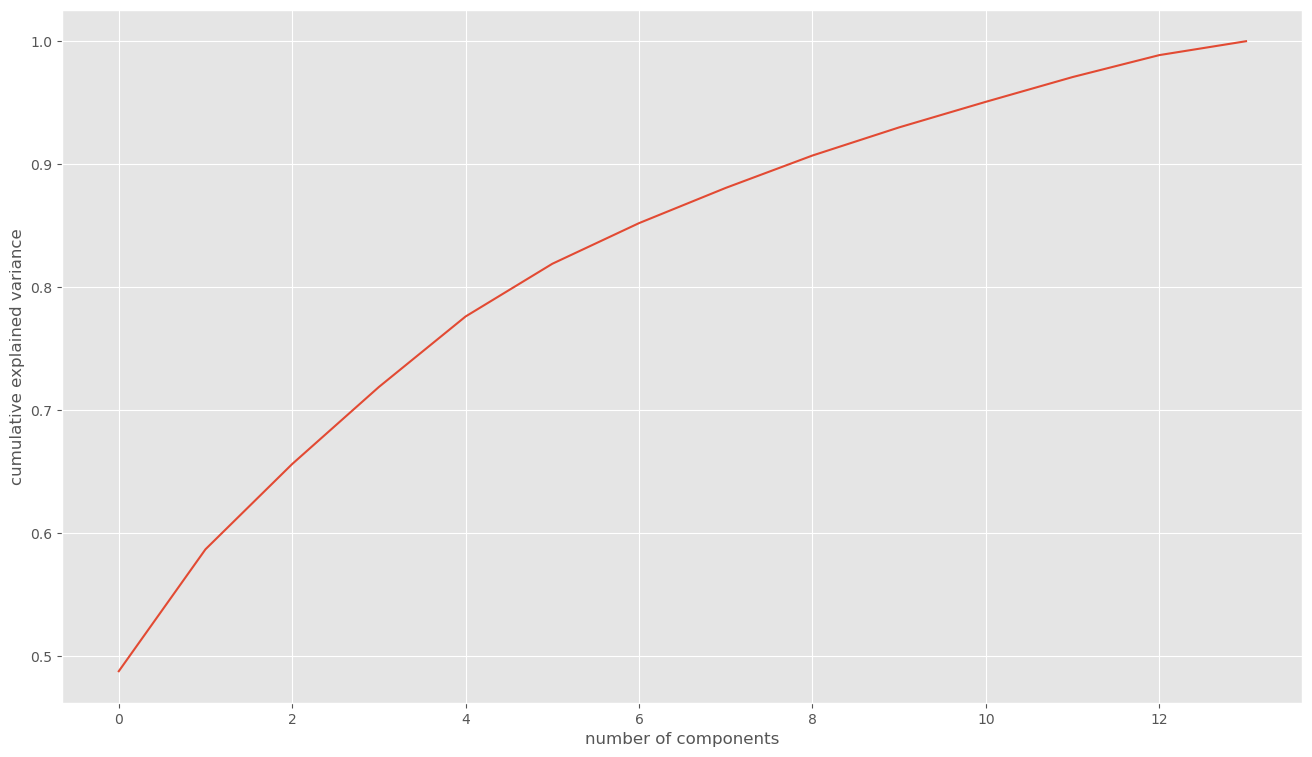

In [275]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

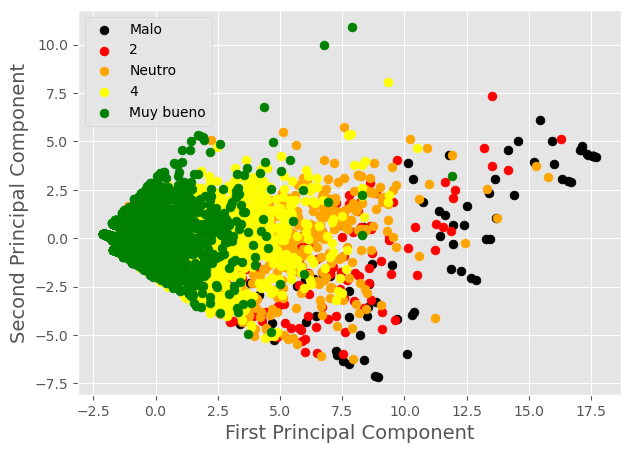

In [276]:
Xax=X_pca[:,0]
Yax=X_pca[:,1]
labels=datos['P1.1'].values
cdict={1:'black',2:"red",3:"orange",4:"yellow",5:"green"}
labl={1:'Malo',2:"2",3:"Neutro",4:"4",5:"Muy bueno"}
fig,ax=plt.subplots(figsize=(7,5))
fig.patch.set_facecolor('white')
for l in np.unique(labels):
    ix=np.where(labels==l)
    ax.scatter(Xax[ix],Yax[ix],c=cdict[l],label=labl[l],s=40)

plt.xlabel("First Principal Component",fontsize=14)
plt.ylabel("Second Principal Component",fontsize=14)
plt.legend()

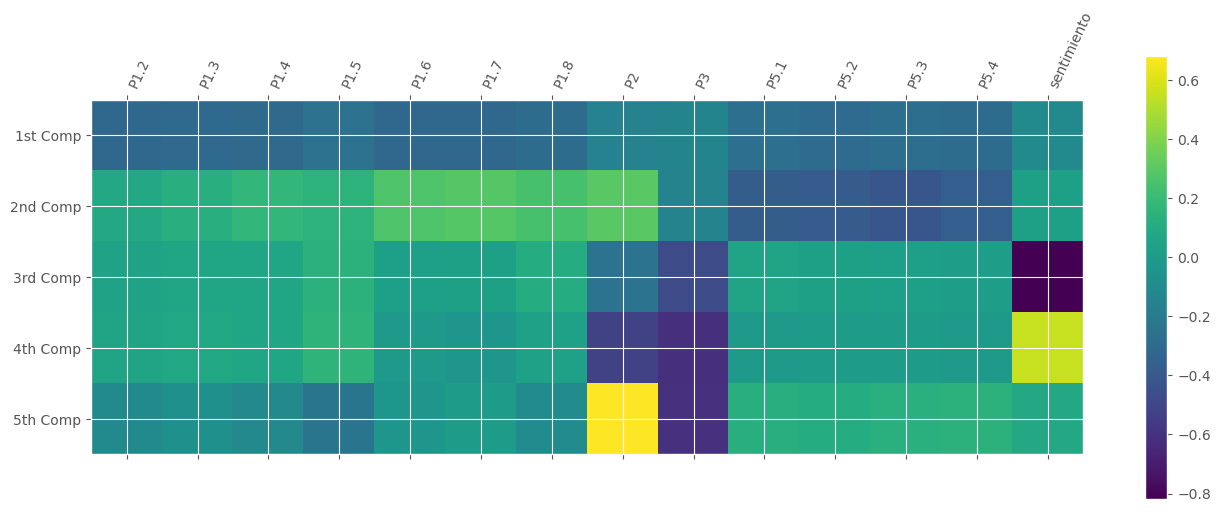

In [277]:
plt.matshow(pca.components_[0:5],cmap='viridis')
plt.yticks([0,1,2,3,4],['1st Comp','2nd Comp','3rd Comp','4th Comp','5th Comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(d.columns)),d.columns,rotation=65,ha='left')
plt.tight_layout()
plt.show()

In [278]:
components = pd.DataFrame(pca.components_, columns = d.columns)
components

P1.2      P1.3      P1.4      P1.5      P1.6      P1.7      P1.8  \
0  -0.318862 -0.305922 -0.300902 -0.249546 -0.317783 -0.311782 -0.287818   
1   0.086940  0.123477  0.175973  0.152444  0.269990  0.290943  0.247205   
2   0.045727  0.069058  0.063869  0.144574  0.030506  0.036949  0.113545   
3   0.057924  0.080229  0.068389  0.161221 -0.003655 -0.027966  0.040199   
4  -0.102299 -0.062277 -0.108810 -0.233238 -0.028182  0.014393 -0.091569   
5   0.123372  0.199326  0.257898 -0.818203  0.244797  0.210872 -0.197260   
6   0.310683  0.527156  0.270276  0.180755 -0.242291 -0.354356 -0.539017   
7   0.113183  0.241354 -0.337217  0.025464 -0.073813 -0.067272  0.123057   
8  -0.346691 -0.332186  0.471309  0.273128  0.185711  0.152619 -0.446776   
9  -0.134488 -0.016960  0.559408 -0.183868 -0.386213 -0.358850  0.526000   
10 -0.401784  0.116998  0.201735  0.008059 -0.030720 -0.020005  0.048086   
11 -0.662581  0.612467 -0.162100  0.024615  0.015896  0.142929  0.022376   
12  0.057484 -0.022236  0.020580 -0.035462  0.008493 -0.042186  0.068885   
13 -0.090951  0.016452 -0.046403 -0.009003  0.717903 -0.683048  0.068707   

          P2        P3      P5.1      P5.2      P5.3      P5.4  sentimiento  
0  -0.150721 -0.142043 -0.266898 -0.294954 -0.277170 -0.287307    -0.101965  
1   0.300257 -0.147538 -0.372916 -0.378669 -0.413088 -0.371252     0.038576  
2  -0.244211 -0.467937  0.059768  0.038509  0.027997  0.023124    -0.817308  
3  -0.526894 -0.609358 -0.003937  0.011990  0.010928 -0.005694     0.554871  
4   0.683868 -0.604248  0.129018  0.110142  0.136458  0.146719     0.091194  
5  -0.218917 -0.019790 -0.123109  0.021217  0.007855  0.013309    -0.040184  
6   0.159600 -0.012237  0.007862 -0.083968 -0.092491 -0.051290    -0.033611  
7   0.016981 -0.002115 -0.775141  0.166023  0.174659  0.360327    -0.020370  
8   0.008814 -0.006986 -0.340586  0.040324  0.303213  0.072500    -0.019761  
9   0.076421  0.005843 -0.129229  0.045221  0.195134 -0.131812     0.014125  
10 -0.019024  0.015200  0.050722  0.094379 -0.647638  0.590657     0.008891  
11 -0.033491  0.041564  0.092870 -0.091715  0.265500 -0.217631     0.008148  
12 -0.022907  0.004255  0.097246 -0.836138  0.271725  0.452727    -0.001106  
13  0.024192 -0.007298  0.007089  0.025950  0.010685 -0.032537    -0.005320

In [279]:
# Split dataset in training and test datasets
dfScaledPca = pd.DataFrame(X_pca, columns = d.columns)
dfScaledPca["P1.1"]=datos["P1.1"]
print (dfScaledPca.head())
print(dfScaledPca.shape)
X_train, X_test = train_test_split(dfScaledPca, test_size=0.2, random_state=4) #6 
y_train =X_train["P1.1"]
y_test = X_test["P1.1"]
X_train = X_train.drop(['P1.1'], axis=1)
X_test = X_test.drop(['P1.1'], axis=1)

       P1.2      P1.3      P1.4      P1.5      P1.6      P1.7      P1.8  \
0 -0.906479  0.376938 -0.187717 -0.253969  0.240337  0.513511 -0.882613   
1  4.063647 -0.104942 -1.233772 -1.066541  0.763143  2.097810  1.631780   
2 -1.322820 -0.233283  2.498949 -1.714382 -0.077654  0.106925  0.796574   
3 -0.781456 -0.545035 -0.748378 -0.186535  0.893622  0.841249 -0.995372   
4  3.812427  0.618516 -0.053582 -1.601136  0.407754 -0.053017 -0.791388   

         P2        P3      P5.1      P5.2      P5.3      P5.4  sentimiento  \
0  0.667087  0.664586  0.419218 -0.231328 -0.979565 -0.060218    -0.024387   
1 -0.771957  1.036003 -1.497963 -0.130944 -0.103511 -0.140698    -0.219659   
2 -0.159435  0.598635 -0.652249 -0.072242 -0.021387 -0.068733    -0.066559   
3  0.668283 -1.710996 -0.926734 -0.483559  0.370701  0.035040     0.126441   
4 -0.809007  1.896714 -2.602247  0.048224  0.446993 -0.247565     0.078203   

   P1.1  
0     4  
1     4  
2     4  
3     5  
4     4  
(10493, 15)


In [280]:
# Instantiate the classifier
gnb = GaussianNB()
# Train classifier
gnb.fit(
    X_train.values,
    y_train
)
y_pred = gnb.predict(X_test)

In [281]:
print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(gnb.score(X_train, y_train))) #batir  87
print('Precisión en el set de Test: {:.2f}'
     .format(gnb.score(X_test, y_test)))  #batir  90

Precisión en el set de Entrenamiento: 0.76
Precisión en el set de Test: 0.75


In [282]:
# Print Test results
print("Total de Muestras en Test: {}\nFallos: {}"
      .format(
          X_test.shape[0],
          (y_test != y_pred).sum()
))

Total de Muestras en Test: 2099
Fallos: 527


In [283]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[   5    3    3    0    0]
 [   5    7   18    3    0]
 [  13    7   46   85    4]
 [   8    5   36  374  109]
 [   1    8   18  201 1140]]
              precision    recall  f1-score   support

           1       0.16      0.45      0.23        11
           2       0.23      0.21      0.22        33
           3       0.38      0.30      0.33       155
           4       0.56      0.70      0.63       532
           5       0.91      0.83      0.87      1368

    accuracy                           0.75      2099
   macro avg       0.45      0.50      0.46      2099
weighted avg       0.77      0.75      0.75      2099



## K-means

In [301]:
X = np.array(datos.drop(columns=["Año", "Mes", "Duración", "P1.1", "Progreso", "Comentario para OSF", "Comentario general", "OSF", "Comentario traducido", "Tipo comentario"]))
y = np.array(datos["P1.1"])
X.shape

(10493, 14)

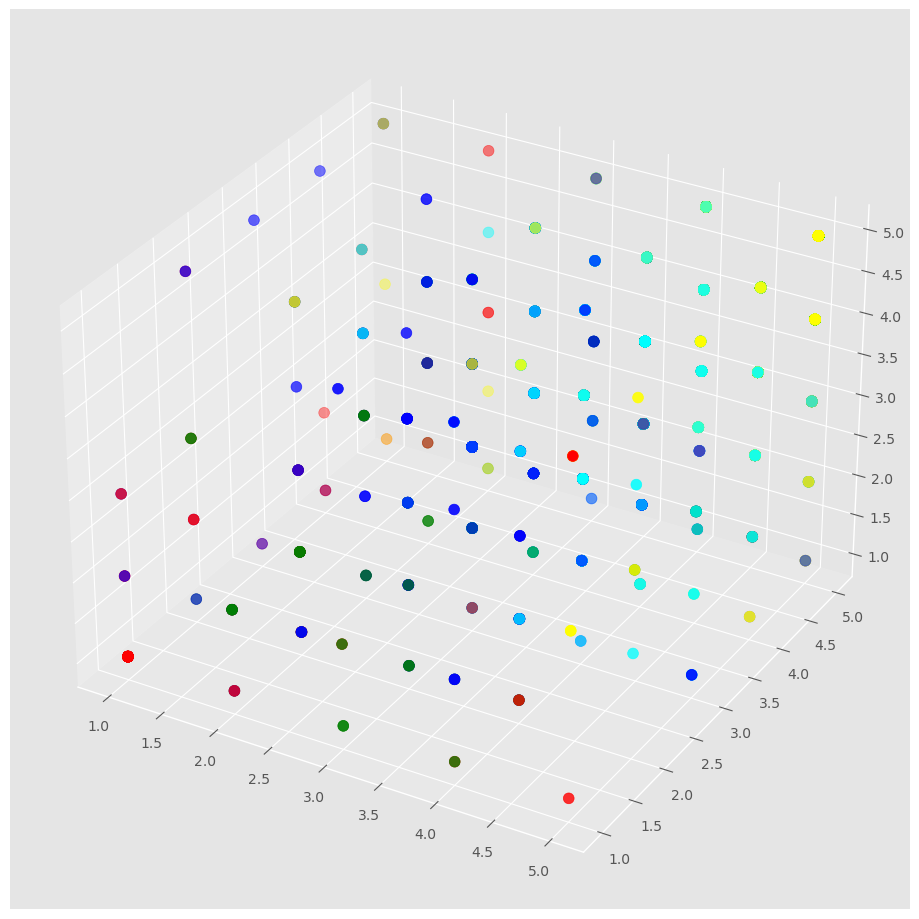

In [302]:
fig = plt.figure()
ax = Axes3D(fig)
colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple']
asignar=[]
for row in y:
    asignar.append(colores[row])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)

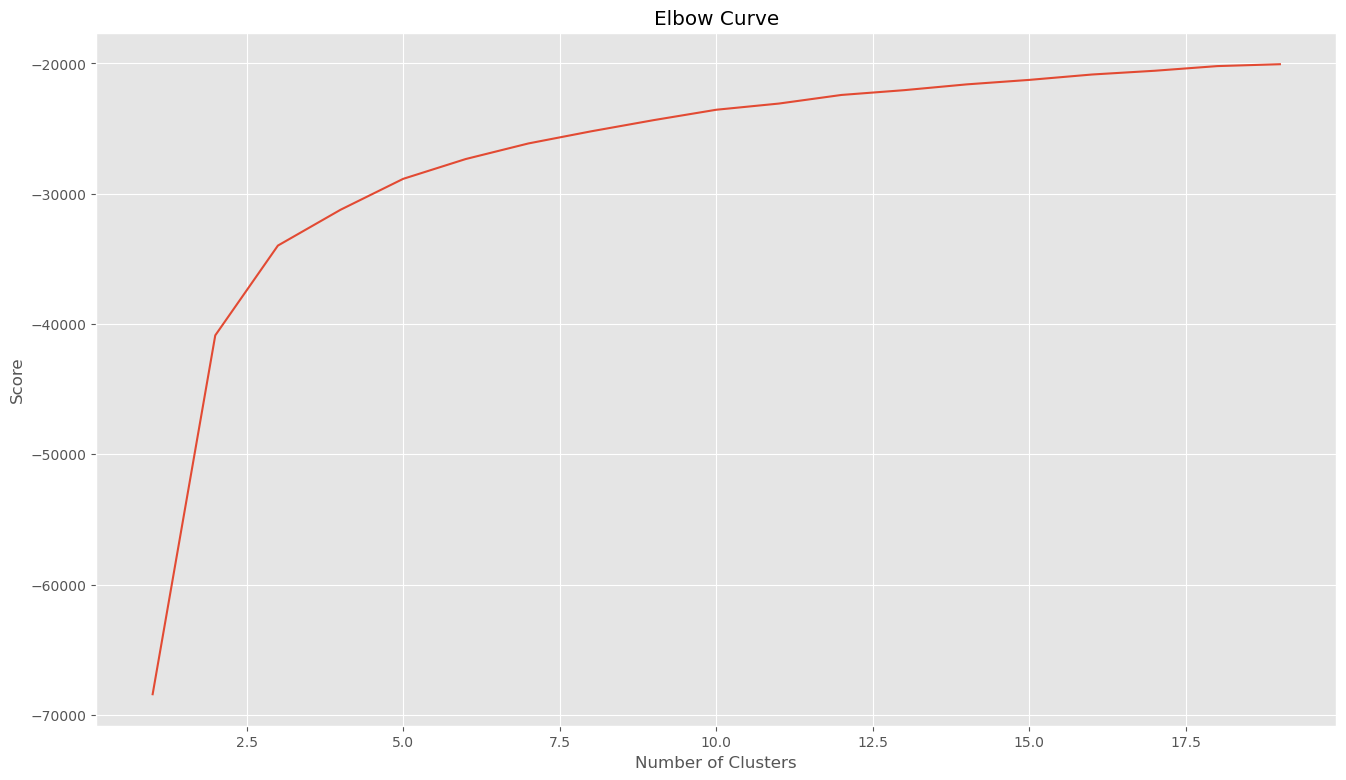

In [303]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [310]:
kmeans = KMeans(n_clusters=3).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[3.05491329 3.07080925 2.65751445 2.81936416 2.41473988 2.3916185
  2.78901734 0.45086705 0.84393064 3.48554913 3.70375723 3.74566474
  3.64884393 0.16872095]
 [4.94153526 4.91743529 4.90717048 4.73490033 4.93930378 4.93409699
  4.88872359 0.91966677 0.99851235 4.86224338 4.94570068 4.93945254
  4.94272538 0.47976562]
 [4.16239039 4.11919454 3.98733355 3.69957778 3.98343618 3.93731731
  3.90289055 0.77167912 0.98733355 4.27671322 4.44852225 4.47320559
  4.44982137 0.39149604]]


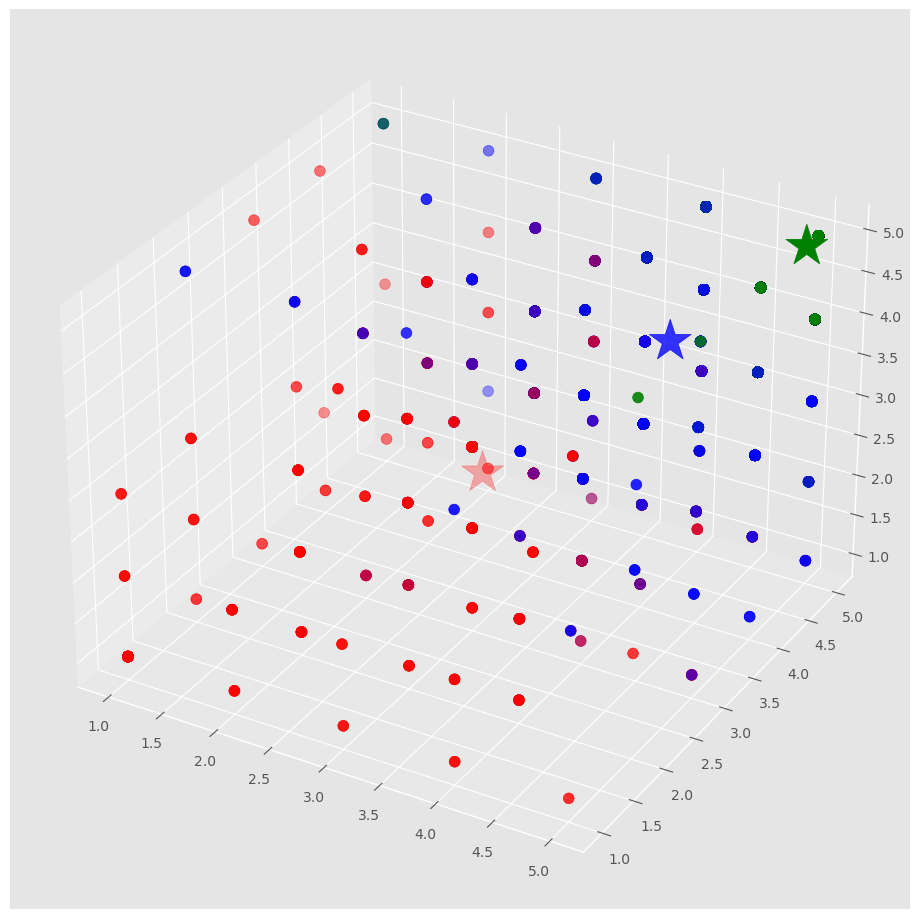

In [312]:
# Obtenemos las etiquetas de cada punto de nuestros datos
labels = kmeans.predict(X)
# Obtenemos los centroids
C = kmeans.cluster_centers_
colores=['red','green','blue']
asignar=[]
for row in labels:
    asignar.append(colores[row])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

In [314]:
copy =  pd.DataFrame()
copy['OSF']=datos['OSF'].values
copy['categoria']=datos['P1.1'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['cluster']=["grupo1", "grupo2", "grupo3"]
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

cluster  cantidad
0  grupo1       692
1  grupo2      6721
2  grupo3      3080

In [320]:
group_referrer_index = copy['label'] ==0
group_referrals = copy[group_referrer_index]

diversidadGrupo =  pd.DataFrame()
diversidadGrupo['categoria']=[0,1,2,3,4,5]
diversidadGrupo['cantidad']=group_referrals.groupby('categoria').size()
diversidadGrupo.drop(index=[0], inplace=True)
diversidadGrupo

categoria  cantidad
1          1      74.0
2          2      99.0
3          3     362.0
4          4     144.0
5          5      13.0

In [321]:
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
closest

array([3058, 4818, 8202])

In [322]:
print("REPRESENTANTES DE CADA CLUSTER")
users=datos['OSF'].values
i = 0
for row in closest:
    i += 1
    print(i, users[row])

REPRESENTANTES DE CADA CLUSTER
1 Fundación Enrique Yturria García, A.B.P.
2 San Pedro Parques
3 Jóvenes Mexicanos Al Servicio De América (América Solidaria), A.C.


## K-means comentarios

In [324]:
# Clustering using TfidfVectorizer method
tf_idf_vectorizor = TfidfVectorizer(stop_words = 'english',max_features = 20000)
tf_idf = tf_idf_vectorizor.fit_transform(datos["Comentario traducido"])
tf_idf_array = tf_idf.toarray()

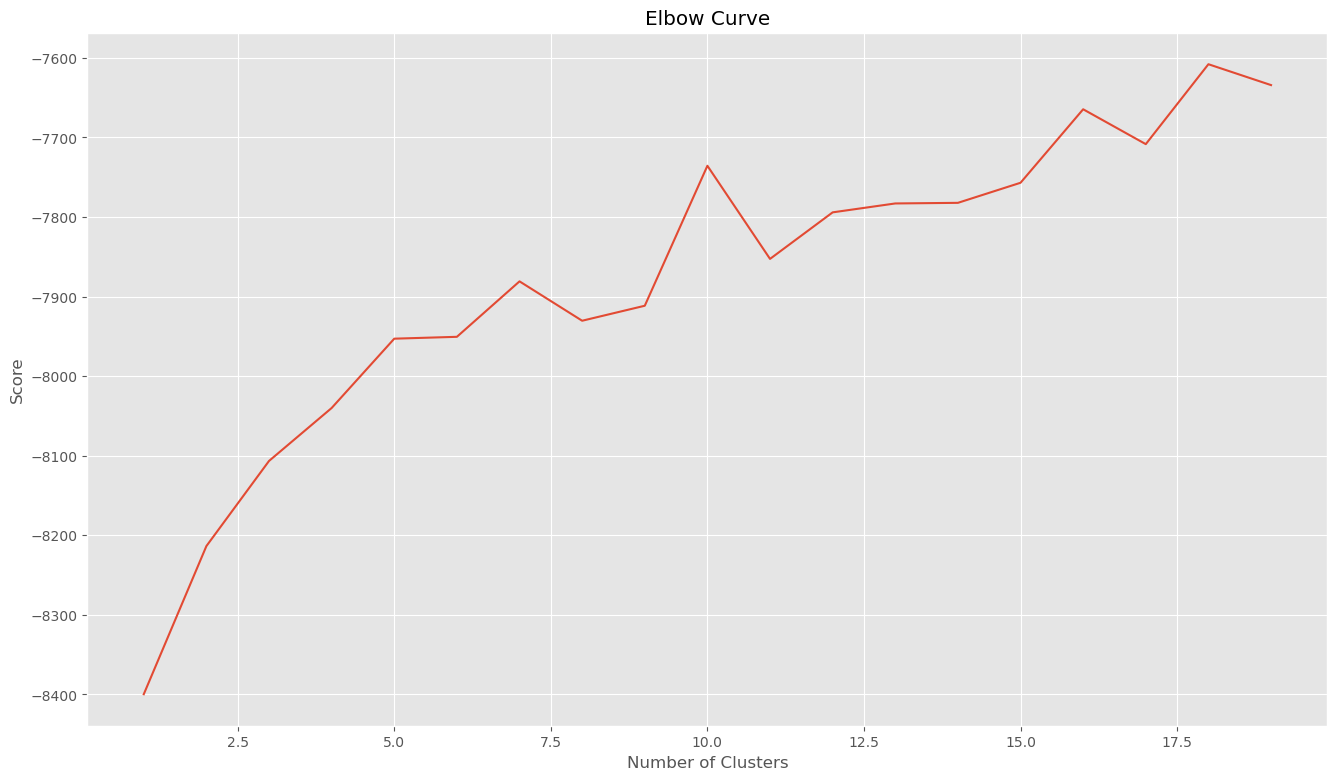

In [325]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(tf_idf_array).score(tf_idf_array) for i in range(len(kmeans))]
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [341]:
kmeans = KMeans(n_clusters=6, algorithm = 'auto') 
kmeans.fit(tf_idf_array)
KMeans(n_clusters=6)
cluster_assignment = kmeans.labels_
clustered_sentences = [[] for i in range(6)]
for sentence_id, cluster_id in enumerate(cluster_assignment):
    clustered_sentences[cluster_id].append(datos["Comentario traducido"][sentence_id])

for i, cluster in enumerate(clustered_sentences):
    print("Cluster ", i+1)
    print(cluster)
    print("")

Cluster  1
['It is difficult to get collaborations in these times of pandemic, but this service taught me and helped improve my way of communicating with businesses and working as a team', "Well, I hope that now my hours are worth it, not like last semester when I did a whole semester and they didn't give me a measly hour, I don't like them", 'The only thing I disliked about the service was the lack of collaboration from my teammates, since they rarely attended meetings with the training partner, did not participate in the development of the challenge, and did not complete their parts of the job on time.\nIt saddened me to see the lack of motivation and empathy from my colleagues when working for a social cause. I truly believe that something should be done about it.', 'I did not feel that my work had an impact, it was very little that I did.', '.', '.', 'I loved it, especially because it is with animals.', '.', '.', 'Despite the current situation we are experiencing and the distance, 

In [342]:
clustered_sentences_df = pd.DataFrame()
clustered_sentences_df["cluster"] = range(1, 7)
clustered_sentences_df["cantidad"] = 0
for i in range(6):
    clustered_sentences_df["cantidad"][i] = len(clustered_sentences[i])

clustered_sentences_df


cluster  cantidad
0        1      7047
1        2      1087
2        3       305
3        4       146
4        5       452
5        6      1456

In [343]:
sentiment_values = []
for y in range(6):
    sentiment_values_y = [sentiment.polarity_scores(i)["compound"] for i in clustered_sentences[y]]
    sentiment_values.append(sentiment_values_y)

clustered_sentences_df["sentimiento promedio"] = 0
clustered_sentences_df["length promedio"] = 0
a = -1
for i in clustered_sentences:
    suma = 0
    s = 0
    c = 0
    a+=1
    for y in i:
        s += len(y)
        suma += sentiment.polarity_scores(y)["compound"]
        c += 1
    promedio = suma/c
    p = s/c
    clustered_sentences_df["sentimiento promedio"][a] = promedio
    clustered_sentences_df["length promedio"][a] = p

clustered_sentences_df

cluster  cantidad  sentimiento promedio  length promedio
0        1      7047              0.357857       105.261530
1        2      1087              0.565425       107.281509
2        3       305              0.504331        21.829508
3        4       146              0.629528        19.602740
4        5       452              0.575060        84.719027
5        6      1456              0.621608       104.918956

In [344]:
stopword = stopwords.words('english') + ["able", "many", "social", "know", "little", "need", "give", "gave", "continue", "much", "several", "service", "project", "experience"]

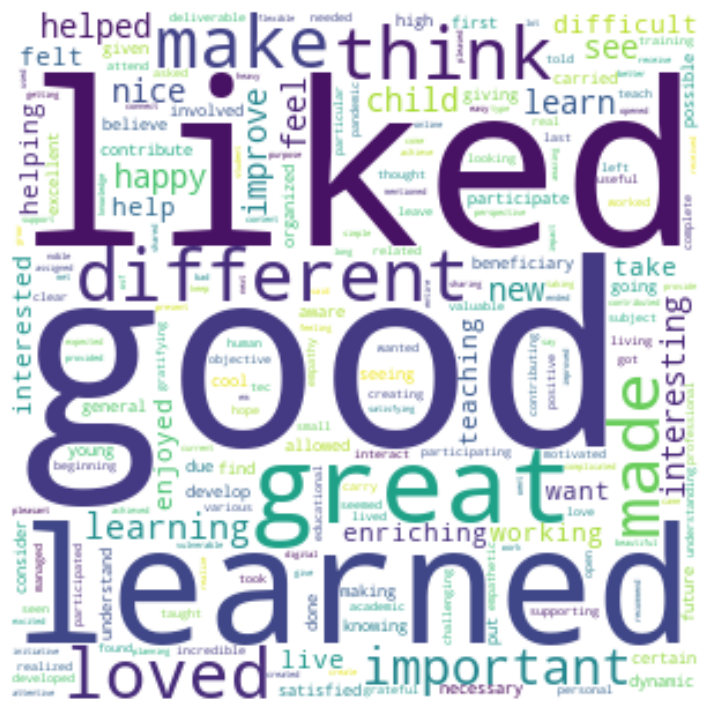

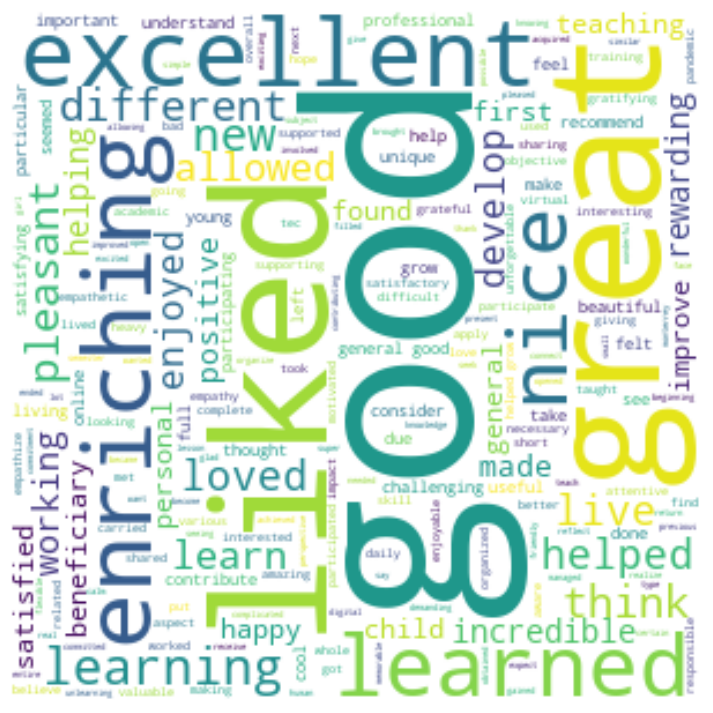

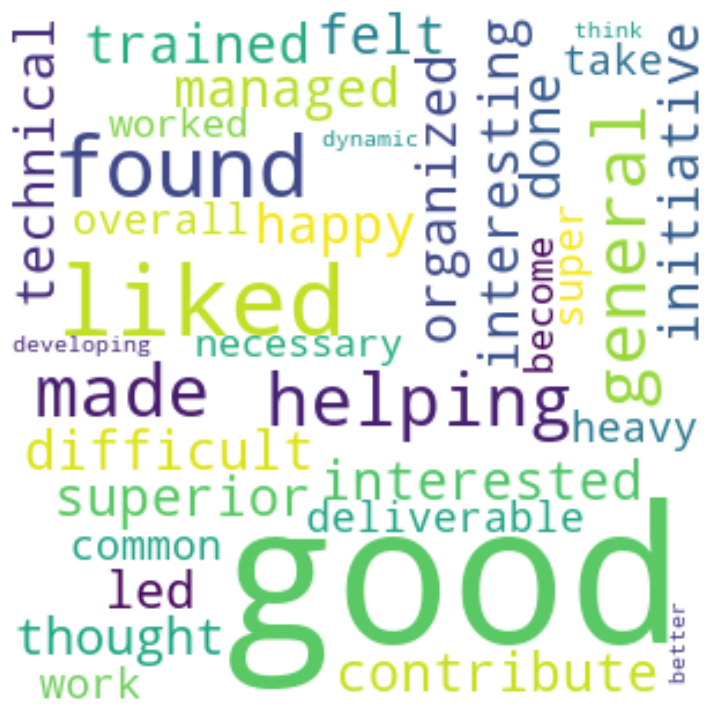

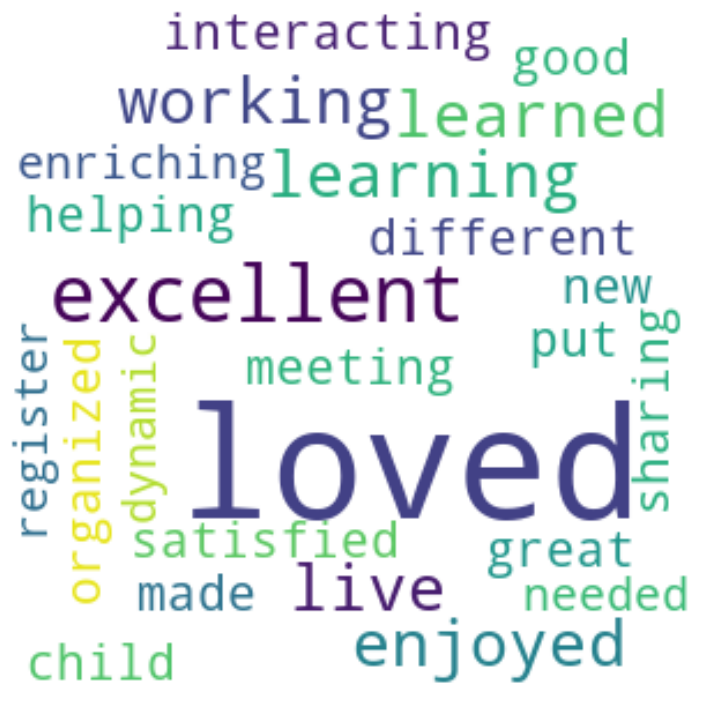

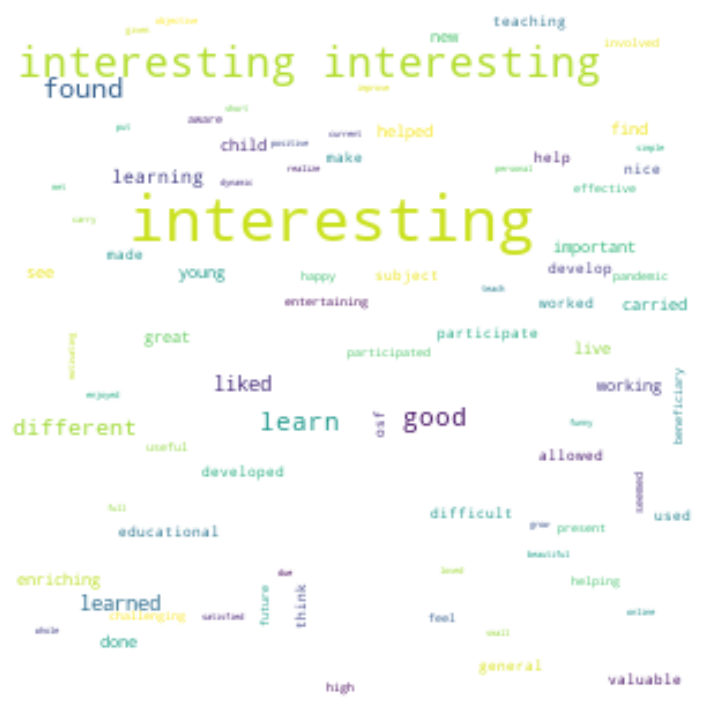

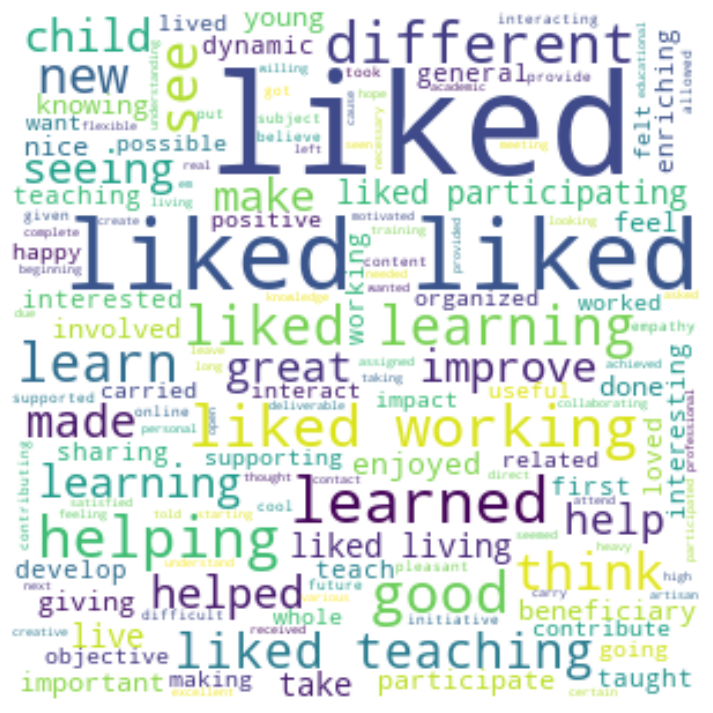

In [345]:
# CLUSTERS
def grafica_cluster(number):
    # Pasar de lista a string
    cluster = ""
    for i in clustered_sentences[number]:
        cluster = cluster + i + "\n"
        
    # Preparación para NLP de Comentario para OSF
    tokenized = word_tokenize(cluster)
    tokenized_words = [i.lower() for i in tokenized if (i.isalpha() and len(i)>2)]

    no_stopwords = [i for i in tokenized_words if i not in stopword]

    # "normalizar" palabras
    wordnet_lemmatizer = WordNetLemmatizer()
    lemmatized = [wordnet_lemmatizer.lemmatize(i) for i in no_stopwords]

    tagged_sent = nltk.pos_tag(lemmatized)

    s = ""
    for i in tagged_sent:
        if ((i[1]=="JJ") | (i[1]=="VB") | (i[1]=="VBD") | (i[1]=="VBG") | (i[1]=="VBN") | (i[1]=="VBP")):
            s+=i[0]+" "

    from wordcloud import WordCloud

    wc = WordCloud(width = 300, height = 300, background_color = "white").generate(s)

    # Eliminar los ejes y mostrar los datos como imagen
    plt.axis("off")
    plt.imshow(wc, interpolation = "bilinear")
    plt.show()

grafica_cluster(0)
grafica_cluster(1)
grafica_cluster(2)
grafica_cluster(3)
grafica_cluster(4)
grafica_cluster(5)


## DBSCAN

In [234]:
X_train = datos[["P1.1", "P1.2", "P1.3", "P1.4", "P1.5", "P1.6", "P1.7", "P2", "P3", "P5.1", "P5.2", "P5.3", "P5.4"]]

In [237]:
clustering = DBSCAN(eps=2, min_samples=4).fit(X_train)
DBSCAN_dataset = X_train.copy()
DBSCAN_dataset.loc[:,'Cluster'] = clustering.labels_ 

In [238]:
DBSCAN_dataset.Cluster.value_counts().to_frame()


Cluster
 0    10245
-1      225
 2       17
 1        6

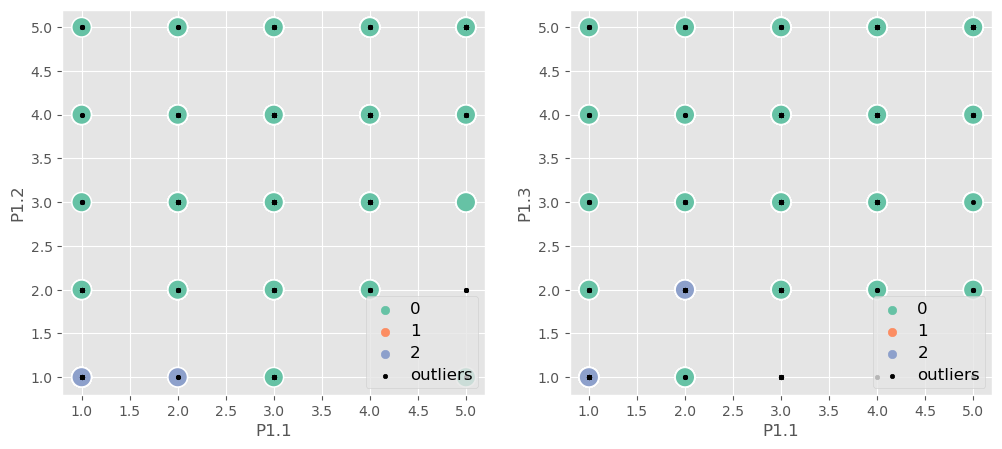

In [244]:
outliers = DBSCAN_dataset[DBSCAN_dataset['Cluster']==-1]

fig2, (axes) = plt.subplots(1,2,figsize=(12,5))

sns.scatterplot('P1.1', 'P1.2',

                data=DBSCAN_dataset[DBSCAN_dataset['Cluster']!=-1],

                hue='Cluster', ax=axes[0], palette='Set2', legend='full', s=200)

sns.scatterplot('P1.1', 'P1.3',

                data=DBSCAN_dataset[DBSCAN_dataset['Cluster']!=-1],

                hue='Cluster', palette='Set2', ax=axes[1], legend='full', s=200)

axes[0].scatter(outliers['P1.1'], outliers['P1.2'], s=10, label='outliers', c="k")

axes[1].scatter(outliers['P1.1'], outliers['P1.3'], s=10, label='outliers', c="k")
axes[0].legend()
axes[1].legend()

plt.setp(axes[0].get_legend().get_texts(), fontsize='12')
plt.setp(axes[1].get_legend().get_texts(), fontsize='12')

plt.show()

In [245]:
# Función que busca los paramétros más adecuados para hacer el modelo
def get_scores_and_labels(combinations, X):
    scores= []
    all_labels_list= []
    for i, (eps, num_samples) in enumerate(combinations):
        dbscan_cluster_model=DBSCAN(eps=eps, min_samples=num_samples).fit(X)
        labels = dbscan_cluster_model.labels_
        labels_set = set(labels)
        num_clusters = len(labels_set)
        if(-1 in labels_set):
            num_clusters -=1
        if(num_clusters < 2 or num_clusters > 50):
            scores.append(-10)
            all_labels_list.append('bad')
            c = (eps,num_samples)
            print(f'Combination{c} on iteration {i+1} of {N} has {num_clusters}. Moving on')
            continue
            
        scores.append(ss(X, labels))
        all_labels_list.append(labels)

        print(f'Index:{i}, Score:{scores[-1]}, Labels:{all_labels_list[-1]}, Num_clusters:{num_clusters}')

        best_index=np.argmax(scores)
        best_parameters= combinations[best_index]
        best_labels =all_labels_list[best_index]
        best_score = scores[best_index]

        return {'best_epsilon':best_parameters[0],
                'best_min_samples':best_parameters[1],
                'best_labels': best_labels,
                'best_score': best_score}

best_dict = get_scores_and_labels(combinations=combinations, X=X_train)

Combination(0.01, 2) on iteration 1 of 90 has 558. Moving on
Combination(0.01, 5) on iteration 2 of 90 has 139. Moving on
Combination(0.01, 8) on iteration 3 of 90 has 76. Moving on
Index:3, Score:0.3580587507368378, Labels:[-1 -1  0 ... 14  1 -1], Num_clusters:48


In [246]:
nbrs=neighb.fit(X_train) # fitting the data to the object
distances,indices=nbrs.kneighbors(X_train)

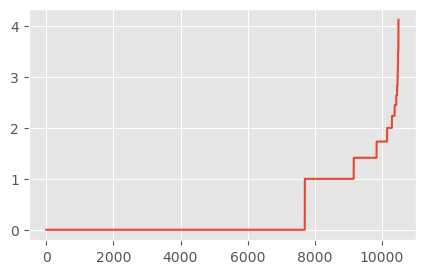

In [247]:
distances = np.sort(distances, axis = 0) # sorting the distances
distances = distances[:, 1] # taking the second column of the sorted distances
plt.rcParams['figure.figsize'] = (5,3) # setting the figure size
plt.plot(distances) # plotting the distances
plt.show() # showing the plot